In [196]:
#import all packages required
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [197]:
data=pd.read_json('linkedin_subset.json')

In [198]:
data.head()

,_id,awards,certifications,courses,created_date,designation,education,experience,groups,interests,...,patents,personalInfo,projects,publications,query_company,recomendations,skills,url,version,volunteering
0,{'$oid': '5920ad0a4893c245d7862fc7'},[],[],NaN,{'$date': '2017-05-20T20:54:34.377Z'},"Senior Associate, Hiring at Sapient Global Mar...","[{'company': 'MBA, Marketing, Finance, HRMBA, ...","[{'company': 'Sapient Global Markets', 'locati...","[{'name': 'PostgreSQL Professionals'}, {'name'...",[],...,[],"{'industry': 'Human Resources', 'summary': 'Ar...",[],NaN,Intel,[{'description': 'Narayan is an excellent cons...,[],https://in.linkedin.com/in/narayanshetti,NaN,[]
1,{'$oid': '591f14fd2fdc28744c530c49'},[],[],NaN,{'$date': '2017-05-19T15:53:32.700Z'},Electrical Engineer,"[{'company': 'Bachelor of Engineering (B.E.), ...",[],[],[],...,[],"{'name': 'RAKESH MULEY', 'designation': 'Elect...",[],NaN,Jet Airways (India) Ltd.,[],[],https://in.linkedin.com/in/rakesh-muley-371781136,NaN,[]
2,{'$oid': '59273c65bfddd748d8c1118a'},[],[],[],{'$date': '2017-05-25T20:19:49.113Z'},--,[],[],[],[],...,[],"{'name': 'Sujiya Suji', 'designation': '--', '...",[],[],Analog Devices,[],[],https://in.linkedin.com/in/sujiya-suji-13557b11b,2.0,[]
3,{'$oid': '59293f0bf01bb93f05ef132e'},[],[],[],{'$date': '2017-05-27T08:55:38.833Z'},--,[],[],[],[],...,[],"{'name': 'Gupta Vinu', 'designation': '--', 'l...",[],[],SCA,[],[],https://in.linkedin.com/in/gupta-vinu-3b1974127,2.0,[]
4,{'$oid': '5931b268485ed579697bc8b3'},[],[],[],{'$date': '2017-06-02T18:46:00.029Z'},--,[],[],[],[],...,[],"{'name': 'santosh gn', 'designation': '--', 'l...",[],[],Marlabs,[],[],https://in.linkedin.com/in/santosh-gn-42aa41a8,2.0,[]


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
_id               20000 non-null object
awards            20000 non-null object
certifications    20000 non-null object
courses           11978 non-null object
created_date      20000 non-null object
designation       20000 non-null object
education         20000 non-null object
experience        20000 non-null object
groups            20000 non-null object
interests         20000 non-null object
languages         20000 non-null object
name              20000 non-null object
organizations     11978 non-null object
patents           20000 non-null object
personalInfo      20000 non-null object
projects          20000 non-null object
publications      11978 non-null object
query_company     20000 non-null object
recomendations    20000 non-null object
skills            20000 non-null object
url               20000 non-null object
version           11978 non-null float64
volunteeri

In [200]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/data_len)*100})
missing_data

,total_missing,perc_missing
_id,0,0.00
awards,0,0.00
certifications,0,0.00
courses,8022,40.11
created_date,0,0.00
designation,0,0.00
education,0,0.00
experience,0,0.00
groups,0,0.00
interests,0,0.00


In [201]:
train=data.drop(['_id','created_date','url','version','name','interests','personalInfo','query_company'],axis=1)

In [202]:
train.head()

,awards,certifications,courses,designation,education,experience,groups,languages,organizations,patents,projects,publications,recomendations,skills,volunteering
0,[],[],NaN,"Senior Associate, Hiring at Sapient Global Mar...","[{'company': 'MBA, Marketing, Finance, HRMBA, ...","[{'company': 'Sapient Global Markets', 'locati...","[{'name': 'PostgreSQL Professionals'}, {'name'...",[],NaN,[],[],NaN,[{'description': 'Narayan is an excellent cons...,[],[]
1,[],[],NaN,Electrical Engineer,"[{'company': 'Bachelor of Engineering (B.E.), ...",[],[],[],NaN,[],[],NaN,[],[],[]
2,[],[],[],--,[],[],[],[],[],[],[],[],[],[],[]
3,[],[],[],--,[],[],[],[],[],[],[],[],[],[],[]
4,[],[],[],--,[],[],[],[],[],[],[],[],[],[],[]


In [203]:
#for awards column how many awards achieved ....greater the awards greater the profile strength
count=0
for i in range(len(train['awards'])):
    if train['awards'][i] ==[]:
        train['awards'][i]=0
        count=count+1
    else:
        train['awards'][i]=len(train['awards'][i])

In [204]:
train['awards'].value_counts()

0     19674
1       142
2        67
3        51
4        22
5        16
7        10
6         7
12        2
10        2
9         2
8         2
52        1
14        1
11        1
Name: awards, dtype: int64

In [205]:
#analyze of certifications categorical variable certifications mentioned or not
count=0
for i in range(len(train['certifications'])):
    if train['certifications'][i] ==[]:   #agr aisa hai to
        train['certifications'][i]=0      #usko zero kr dega
        count=count+1                      #fir usko count krega
    else:
        train['certifications'][i]=1    #fer aise hi 1 hai to
train['certifications'].value_counts()

0    18969
1     1031
Name: certifications, dtype: int64

In [206]:
#Fill the NAN values with 'Unknown' then categorise as 0/1 courses taken/not
train.courses = train.courses.fillna('Unknown')
count=0
counter=0
for i in range(len(train['courses'])):
    if train['courses'][i] ==[] or  train['courses'][i]=='Unknown':
        train['courses'][i]=0
        count=count+1
    else:
        train['courses'][i]=1#=len(train['awards'][i])
        #print(i)
train['courses'].value_counts()

0    19760
1      240
Name: courses, dtype: int64

In [207]:
#Designation mentioned or not if mentioned profile strength good else no
count=0
counter=0
for i in range(len(train['designation'])):
    if train['designation'][i] == '--' :
        train['designation'][i]=0
        count=count+1
    else:
        train['designation'][i]=1#=len(train['awards'][i])
        #print(i)

train['designation'].value_counts()

0    10205
1     9795
Name: designation, dtype: int64

In [208]:
#education data present or not (0/1)
count=0
counter=0
for i in range(len(train['education'])):
    if train['education'][i] == [] :
        train['education'][i]=0
        count=count+1
    else:
        train['education'][i]=1#=len(train['awards'][i])
 #       print(i)
        
train['education'].value_counts()

0    11801
1     8199
Name: education, dtype: int64

In [209]:
#For Experience more number of experiences higher the profile strength
count=0
counter=0
for i in range(len(train['experience'])):
    if train['experience'][i] == [] :
        train['experience'][i]=0
        count=count+1
    else:
        train['experience'][i]=len(train['experience'][i])
        #print(i)
        
train['experience'].value_counts()

0     10083
1      4398
2      2011
3      1417
4       862
5       523
6       315
7       163
8        96
9        62
10       27
11       16
12       12
13        6
14        6
23        1
16        1
28        1
Name: experience, dtype: int64

In [211]:
#conversion number of groups each id belongs because more number of groups profile strength increases groups
count=0
counter=0
for i in range(len(train['groups'])):
    if train['groups'][i] == [] :
        train['groups'][i]=0
        count=count+1
    else:
        train['groups'][i]=len(train['groups'][i])
        #print(i)
        
train['groups'].value_counts()

0     15125
1      1362
2       705
14      625
3       527
4       363
5       289
6       249
7       173
8       157
9       113
10       95
11       77
12       69
13       68
17        1
15        1
28        1
Name: groups, dtype: int64

In [212]:
#conversion to Number of languages each id knows, more languages stronger the profile
count=0
counter=0
for i in range(len(train['languages'])):
    if train['languages'][i] == [] :
        train['languages'][i]=0
        count=count+1
    else:
        train['languages'][i]=len(train['languages'][i])
        #print(i)
        
train['languages'].value_counts()

0     17444
3       857
2       686
1       500
4       358
5       123
6        21
7         7
21        1
16        1
12        1
8         1
Name: languages, dtype: int64

In [213]:
#patents as categorical variable patent present or not if present profile is stronger 
count=0
counter=0
for i in range(len(train['patents'])):
    if train['patents'][i] ==[]:
        train['patents'][i]=0
        count=count+1
    else:
        train['patents'][i]=1#len(train['organizations'][i])
        #print(i)
        
train['patents'].value_counts()

0    19972
1       28
Name: patents, dtype: int64

In [214]:
#Projects done or not higher projects greater the profile
count=0
counter=0
for i in range(len(train['projects'])):
    if train['projects'][i] == []:
        train['projects'][i]=0
        count=count+1
    else:
        train['projects'][i]=len(train['projects'][i])#=1#len(train['organizations'][i])
        #print(i)
train['projects'].value_counts()

0     19353
1       330
2       136
3        78
4        34
5        24
6        16
7         8
8         6
10        4
12        3
11        3
27        2
19        1
14        1
13        1
Name: projects, dtype: int64

In [215]:
#converted to categorical variable 0 if no publication else 1 for publication present
train.publications = train.publications.fillna('Unknown')
count=0
counter=0
for i in range(len(train['publications'])):
    if train['publications'][i] == [] or train['publications'][i]=='Unknown':
        train['publications'][i]=0
        count=count+1
    else:
        train['publications'][i]=1#=1#len(train['organizations'][i])
        #print(i)

train['publications'].value_counts()

0    19855
1      145
Name: publications, dtype: int64

In [216]:
#Conversion to number of recommendations each id owns
count=0
counter=0
for i in range(len(train['recomendations'])):
    if train['recomendations'][i] == []: #or train['publications'][i]=='Unknown':
        train['recomendations'][i]=0
        count=count+1
    else:
        train['recomendations'][i]=len(train['recomendations'][i])
        #print(i)

train['recomendations'].value_counts()

0    19209
2      445
1      346
Name: recomendations, dtype: int64

In [217]:
#Conversion to Number of skills each id has 
count=0
counter=0
for i in range(len(train['skills'])):
    if train['skills'][i] == []: #or train['publications'][i]=='Unknown':
        train['skills'][i]=0
        count=count+1
    else:
        train['skills'][i]=len(train['skills'][i])
        #print(i)

train['skills'].value_counts()

0     13016
11      670
1       405
13      335
12      331
10      314
5       312
6       310
9       296
16      283
8       282
14      282
2       259
15      242
3       239
17      227
4       216
18      215
19      203
21      188
20      164
22      137
23      127
24      126
25      109
26       82
51       79
27       64
28       53
29       53
31       38
32       34
30       33
33       32
37       29
34       27
41       19
35       18
42       18
40       17
39       16
50       15
45       14
47       14
38       13
43       11
48       10
36       10
49        4
44        3
46        3
54        1
7         1
75        1
Name: skills, dtype: int64

In [218]:
#conversion to categorical 0/1 variable
count=0
counter=0
for i in range(len(train['volunteering'])):
    if train['volunteering'][i] == []: #or train['publications'][i]=='Unknown':
        train['volunteering'][i]=0
        count=count+1
    else:
        train['volunteering'][i]=1#len(train['skills'][i])
        #print(i)

train['volunteering'].value_counts()

0    19637
1      363
Name: volunteering, dtype: int64

In [219]:
train.organizations = train.organizations.fillna('Unknown')
count=0
counter=0
for i in range(len(train['organizations'])):
    if train['organizations'][i] == [] or train['organizations'][i]=='Unknown':
        train['organizations'][i]=0
        count=count+1
    else:
        train['organizations'][i]=1#len(train['skills'][i])
        #print(i)

train['organizations'].value_counts()

0    19801
1      199
Name: organizations, dtype: int64

In [220]:
#to visualize sample top dataset
train.head()

,awards,certifications,courses,designation,education,experience,groups,languages,organizations,patents,projects,publications,recomendations,skills,volunteering
0,0,0,0,1,1,6,14,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
#check how many unique elements, frequency present in dataset
train.describe()

,awards,certifications,courses,designation,education,experience,groups,languages,organizations,patents,projects,publications,recomendations,skills,volunteering
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,15,2,2,2,2,18,18,12,2,2,16,2,3,54,2
top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,19674,18969,19760,10205,11801,10083,15125,17444,19801,19972,19353,19855,19209,13016,19637


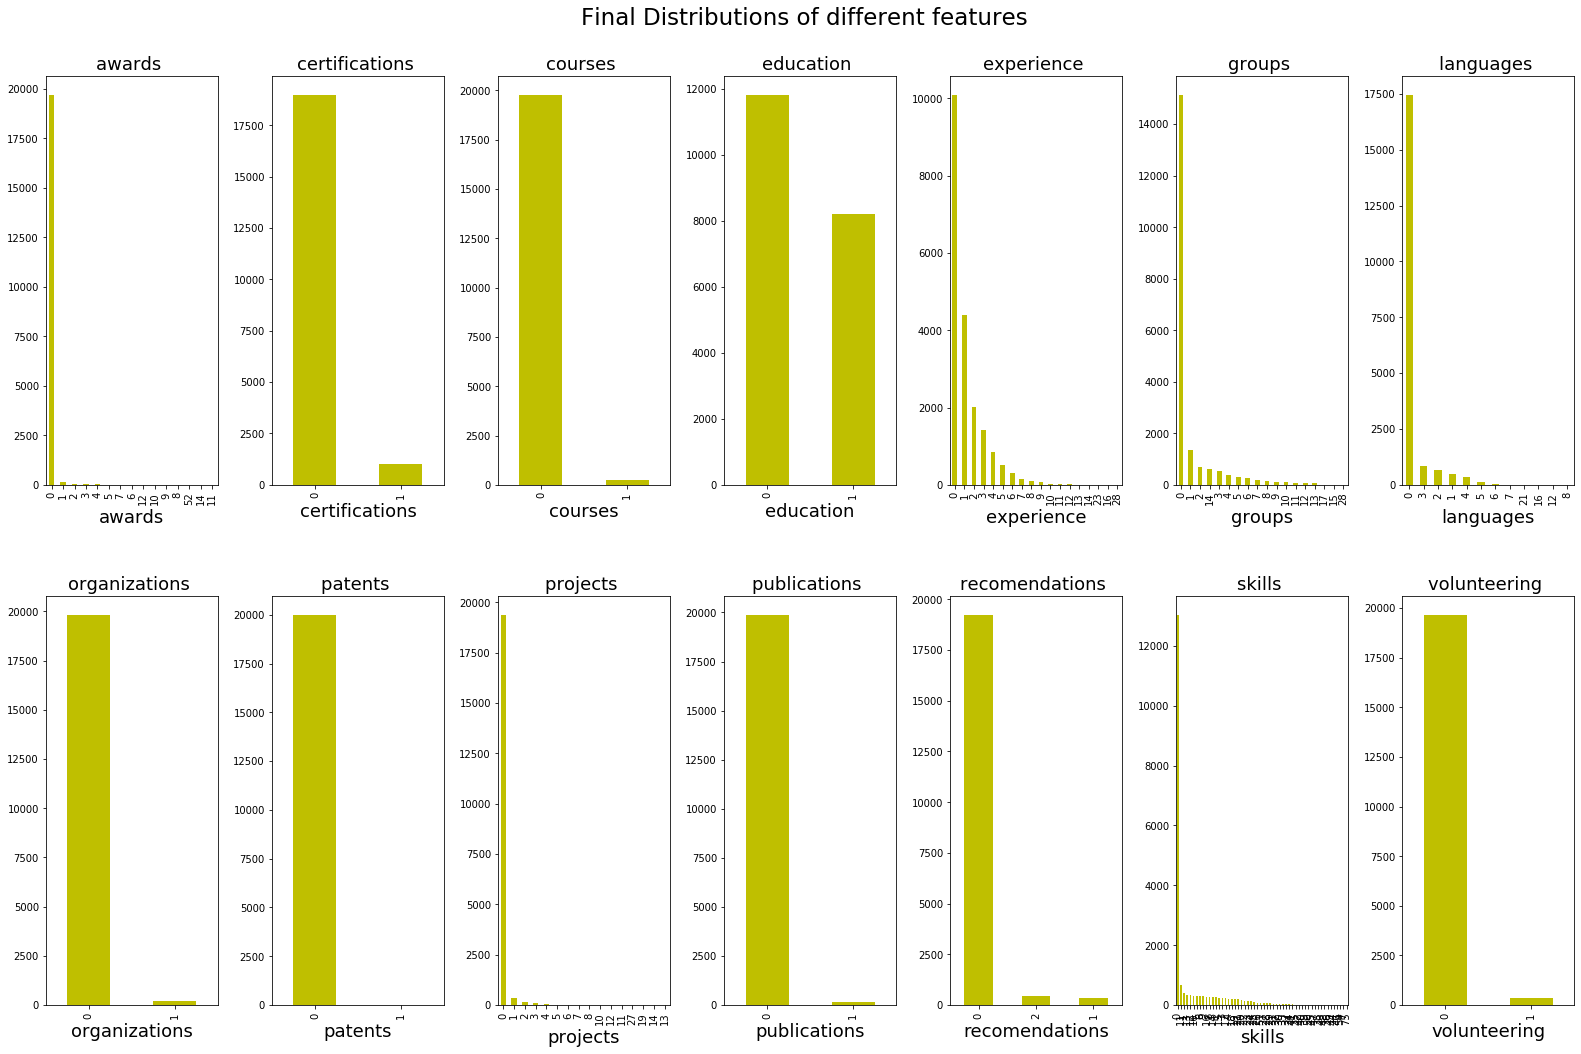

In [222]:
#Visualization of each attribute present in train dataset
def plot_dist(col, ax):
    if col != 'height':
        train[col].value_counts().plot('bar', facecolor='y', ax=ax)
    else:
        train[col].plot('density', ax=ax, bw_method = 0.15, color='y')
        ax.set_xlim(130,200)
        ax.set_ylim(0, 0.07)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} ".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(2,7, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['awards','certifications', 'courses', 'education', 'experience', 'groups', 'languages', 'organizations','patents','projects','publications','recomendations','skills','volunteering']
k = 0
for i in range(2):
    for j in range(7):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Final Distributions of different features", fontsize= 23)

In [224]:
#scaling actually not required as most of the data is categorical and have same range 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train)

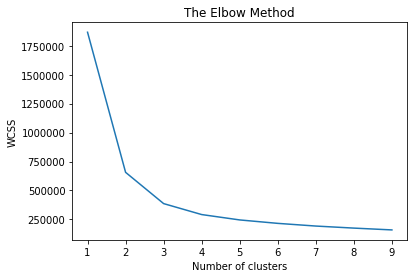

In [225]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_) #deviation value
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [226]:
#On Seeing the graph number of clusters is set to 3 try with 2 also
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(train)

In [228]:
#For 2D visualization i am USING PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
pca.fit(train) 
train_pca=pca.transform(train) 

In [229]:
train_pca.shape

(20000, 2)

In [230]:
pca=PCA(n_components=2) 
pca.fit(kmeans.cluster_centers_) 
centroids=pca.transform(kmeans.cluster_centers_) 

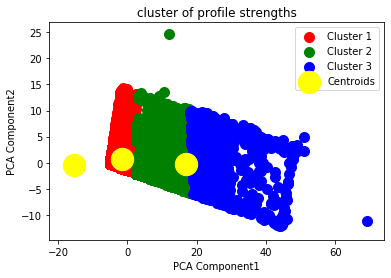

In [233]:
plt.scatter(train_pca[y_kmeans == 0, 0], train_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(train_pca[y_kmeans == 1, 0], train_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(train_pca[y_kmeans == 2, 0], train_pca[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 500, c = 'yellow', label = 'Centroids')
plt.title('cluster of profile strengths')
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.legend()
plt.show()

In [234]:
pd.DataFrame(y_kmeans).to_csv('cool.csv')

In [235]:
#To predict on new data use:
import random
number=random.randint(0,20000)
cluster1=kmeans.predict([train.iloc[number,:]])
print('The data sample having index '+str(number)+' in dataaset belongs to cluster--'+str(cluster1))

The data sample having index 5844 in dataaset belongs to cluster--[0]


In [2]:
pwd


'C:\\Users\\Tiger Singh'